In [1]:
import os

import numpy as np
import pandas as pd
import scanpy as sc
from sklearn.neural_network import MLPClassifier

import matplotlib.pyplot as plt
import seaborn as sns

sc.settings.n_jobs = 24
sc.settings.set_figure_params(dpi=180, dpi_save=300, frameon=False, figsize=(4, 4), fontsize=8, facecolor='white')

In [2]:
import numpy as np
import pandas as pd
import anndata as ad
from scipy.sparse import csr_matrix
print(ad.__version__)

0.8.0


# 1. Convert RNAseq data to Anndata

In [3]:
data_path=r'L:\Shiwei\DNA_MERFISH_analysis\10x_nuclei_v3_MOp_AIBS\Analysis_10X_nuclei_v3_AIBS\data\10X_nuclei_v3_AIBS'


## Make AnnData from count matrix

In [ ]:



matrix_fname = os.path.join(data_path,r'umi_counts.h5')
adata = sc.read_10x_h5(matrix_fname, genome=None, gex_only=True, backup_url=None)

adata

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


AnnData object with n_obs × n_vars = 90266 × 31053
    var: 'gene_ids', 'feature_types', 'genome'

In [59]:
adata.obs

""
AAACCCAAGACCATGG-1
AAACCCAAGAGCTGAC-1
AAACCCAAGCTCTTCC-1
AAACCCAAGGCGCTTC-1
AAACCCAAGTCGAATA-1
...
TTTGTTGTCCCTAGGG-5
TTTGTTGTCCTGGTCT-5
TTTGTTGTCGCATTGA-5
TTTGTTGTCTCACCCA-5


In [60]:
adata.var

,gene_ids,feature_types,genome
Xkr4,ENSMUSG00000051951,Gene Expression,mm10-3.0.0_premrna
Gm1992,ENSMUSG00000089699,Gene Expression,mm10-3.0.0_premrna
Gm37381,ENSMUSG00000102343,Gene Expression,mm10-3.0.0_premrna
Rp1,ENSMUSG00000025900,Gene Expression,mm10-3.0.0_premrna
Sox17,ENSMUSG00000025902,Gene Expression,mm10-3.0.0_premrna
...,...,...,...
AC168977.1,ENSMUSG00000079808,Gene Expression,mm10-3.0.0_premrna
AC149090.1,ENSMUSG00000095041,Gene Expression,mm10-3.0.0_premrna
CAAA01118383.1,ENSMUSG00000063897,Gene Expression,mm10-3.0.0_premrna
Vmn2r122,ENSMUSG00000096730,Gene Expression,mm10-3.0.0_premrna


In [61]:
adata.X

<90266x31053 sparse matrix of type '<class 'numpy.float32'>'
	with 188751777 stored elements in Compressed Sparse Row format>

In [62]:
# add obs and vars names
adata.obs_names 
adata.var_names

Index(['Xkr4', 'Gm1992', 'Gm37381', 'Rp1', 'Sox17', 'Gm37323', 'Mrpl15',
       'Lypla1', 'Gm37988', 'Tcea1',
       ...
       'AC125149.1', 'AC125149.2', 'AC125149.4', 'AC234645.1', 'AC168977.2',
       'AC168977.1', 'AC149090.1', 'CAAA01118383.1', 'Vmn2r122',
       'CAAA01147332.1'],
      dtype='object', length=31053)

In [63]:
adata.var_names

Index(['Xkr4', 'Gm1992', 'Gm37381', 'Rp1', 'Sox17', 'Gm37323', 'Mrpl15',
       'Lypla1', 'Gm37988', 'Tcea1',
       ...
       'AC125149.1', 'AC125149.2', 'AC125149.4', 'AC234645.1', 'AC168977.2',
       'AC168977.1', 'AC149090.1', 'CAAA01118383.1', 'Vmn2r122',
       'CAAA01147332.1'],
      dtype='object', length=31053)

## Add metadata info for AnnData.obs

In [64]:
# Read sample and cluster annotation
import pandas as pd
filename_meta_annotation = os.path.join(data_path,'sample_metadata.csv')

# each cluster annotation
anno_meta = pd.read_csv(filename_meta_annotation, index_col=0)
anno_meta


,aggr_num,umi.counts,gene.counts,library_id,tube_barcode,Seq_batch,Region,Lib_type,Gender,Donor,...,Live_percent,Total_Cells,Live_Cells,method,exp_component_name,mapped_reads,unmapped_reads,nonconf_mapped_reads,total.reads,doublet.score
AAACCCAAGACCATGG-1L8TX_181211_01_A02,1,817,385,L8TX_181211_01_A02,SM-HH8FP-8,RTX-841,MOp,Nuclei_FACS-NeuN,Female,427311,...,NaN,NaN,NaN,10Xv3,AAACCCAAGACCATGG-1L8TX_181211_01_A02,3979.0,118,471,4568,0.00
AAACCCAAGAGCTGAC-1L8TX_181211_01_A02,1,1350,602,L8TX_181211_01_A02,SM-HH8FP-8,RTX-841,MOp,Nuclei_FACS-NeuN,Female,427311,...,NaN,NaN,NaN,10Xv3,AAACCCAAGAGCTGAC-1L8TX_181211_01_A02,5816.0,207,490,6513,0.26
AAACCCAAGCTCTTCC-1L8TX_181211_01_A02,1,28466,4772,L8TX_181211_01_A02,SM-HH8FP-8,RTX-841,MOp,Nuclei_FACS-NeuN,Female,427311,...,NaN,NaN,NaN,10Xv3,AAACCCAAGCTCTTCC-1L8TX_181211_01_A02,148780.0,5108,11063,164951,0.12
AAACCCAAGGCGCTTC-1L8TX_181211_01_A02,1,717,353,L8TX_181211_01_A02,SM-HH8FP-8,RTX-841,MOp,Nuclei_FACS-NeuN,Female,427311,...,NaN,NaN,NaN,10Xv3,AAACCCAAGGCGCTTC-1L8TX_181211_01_A02,3236.0,96,301,3633,0.00
AAACCCAAGTCGAATA-1L8TX_181211_01_A02,1,19669,3803,L8TX_181211_01_A02,SM-HH8FP-8,RTX-841,MOp,Nuclei_FACS-NeuN,Female,427311,...,NaN,NaN,NaN,10Xv3,AAACCCAAGTCGAATA-1L8TX_181211_01_A02,102316.0,3304,7429,113049,0.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTTGTCCCTAGGG-5L8TX_181211_01_H01,5,18615,3961,L8TX_181211_01_H01,SM-HPZA3-4,RTX-842,MOp,Nuclei_FACS-NeuN,Female,427311,...,NaN,NaN,NaN,10Xv3,TTTGTTGTCCCTAGGG-5L8TX_181211_01_H01,83276.0,2392,5066,90734,0.10
TTTGTTGTCCTGGTCT-5L8TX_181211_01_H01,5,23216,4094,L8TX_181211_01_H01,SM-HPZA3-4,RTX-842,MOp,Nuclei_FACS-NeuN,Female,427311,...,NaN,NaN,NaN,10Xv3,TTTGTTGTCCTGGTCT-5L8TX_181211_01_H01,104575.0,2980,6594,114149,0.08
TTTGTTGTCGCATTGA-5L8TX_181211_01_H01,5,1440,681,L8TX_181211_01_H01,SM-HPZA3-4,RTX-842,MOp,Nuclei_FACS-NeuN,Female,427311,...,NaN,NaN,NaN,10Xv3,TTTGTTGTCGCATTGA-5L8TX_181211_01_H01,5635.0,159,507,6301,0.24
TTTGTTGTCTCACCCA-5L8TX_181211_01_H01,5,787,398,L8TX_181211_01_H01,SM-HPZA3-4,RTX-842,MOp,Nuclei_FACS-NeuN,Female,427311,...,NaN,NaN,NaN,10Xv3,TTTGTTGTCTCACCCA-5L8TX_181211_01_H01,3008.0,106,293,3407,0.00


In [65]:
adata.obs = anno_meta

In [66]:
adata.obs

,aggr_num,umi.counts,gene.counts,library_id,tube_barcode,Seq_batch,Region,Lib_type,Gender,Donor,...,Live_percent,Total_Cells,Live_Cells,method,exp_component_name,mapped_reads,unmapped_reads,nonconf_mapped_reads,total.reads,doublet.score
AAACCCAAGACCATGG-1L8TX_181211_01_A02,1,817,385,L8TX_181211_01_A02,SM-HH8FP-8,RTX-841,MOp,Nuclei_FACS-NeuN,Female,427311,...,NaN,NaN,NaN,10Xv3,AAACCCAAGACCATGG-1L8TX_181211_01_A02,3979.0,118,471,4568,0.00
AAACCCAAGAGCTGAC-1L8TX_181211_01_A02,1,1350,602,L8TX_181211_01_A02,SM-HH8FP-8,RTX-841,MOp,Nuclei_FACS-NeuN,Female,427311,...,NaN,NaN,NaN,10Xv3,AAACCCAAGAGCTGAC-1L8TX_181211_01_A02,5816.0,207,490,6513,0.26
AAACCCAAGCTCTTCC-1L8TX_181211_01_A02,1,28466,4772,L8TX_181211_01_A02,SM-HH8FP-8,RTX-841,MOp,Nuclei_FACS-NeuN,Female,427311,...,NaN,NaN,NaN,10Xv3,AAACCCAAGCTCTTCC-1L8TX_181211_01_A02,148780.0,5108,11063,164951,0.12
AAACCCAAGGCGCTTC-1L8TX_181211_01_A02,1,717,353,L8TX_181211_01_A02,SM-HH8FP-8,RTX-841,MOp,Nuclei_FACS-NeuN,Female,427311,...,NaN,NaN,NaN,10Xv3,AAACCCAAGGCGCTTC-1L8TX_181211_01_A02,3236.0,96,301,3633,0.00
AAACCCAAGTCGAATA-1L8TX_181211_01_A02,1,19669,3803,L8TX_181211_01_A02,SM-HH8FP-8,RTX-841,MOp,Nuclei_FACS-NeuN,Female,427311,...,NaN,NaN,NaN,10Xv3,AAACCCAAGTCGAATA-1L8TX_181211_01_A02,102316.0,3304,7429,113049,0.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTTGTCCCTAGGG-5L8TX_181211_01_H01,5,18615,3961,L8TX_181211_01_H01,SM-HPZA3-4,RTX-842,MOp,Nuclei_FACS-NeuN,Female,427311,...,NaN,NaN,NaN,10Xv3,TTTGTTGTCCCTAGGG-5L8TX_181211_01_H01,83276.0,2392,5066,90734,0.10
TTTGTTGTCCTGGTCT-5L8TX_181211_01_H01,5,23216,4094,L8TX_181211_01_H01,SM-HPZA3-4,RTX-842,MOp,Nuclei_FACS-NeuN,Female,427311,...,NaN,NaN,NaN,10Xv3,TTTGTTGTCCTGGTCT-5L8TX_181211_01_H01,104575.0,2980,6594,114149,0.08
TTTGTTGTCGCATTGA-5L8TX_181211_01_H01,5,1440,681,L8TX_181211_01_H01,SM-HPZA3-4,RTX-842,MOp,Nuclei_FACS-NeuN,Female,427311,...,NaN,NaN,NaN,10Xv3,TTTGTTGTCGCATTGA-5L8TX_181211_01_H01,5635.0,159,507,6301,0.24
TTTGTTGTCTCACCCA-5L8TX_181211_01_H01,5,787,398,L8TX_181211_01_H01,SM-HPZA3-4,RTX-842,MOp,Nuclei_FACS-NeuN,Female,427311,...,NaN,NaN,NaN,10Xv3,TTTGTTGTCTCACCCA-5L8TX_181211_01_H01,3008.0,106,293,3407,0.00


## Add cluster info

In [69]:
filename_cluster_annotation = os.path.join(data_path,'cluster.membership.csv')

# each cluster annotation
anno_sample = pd.read_csv(filename_cluster_annotation, index_col=0)
anno_sample

,x
AAACCCAAGCTCTTCC-1L8TX_181211_01_A02,59
AAACCCAAGTCGAATA-1L8TX_181211_01_A02,54
AAACCCACAACCCTAA-1L8TX_181211_01_A02,11
AAACCCAGTATAGCTC-1L8TX_181211_01_A02,34
AAACCCAGTCAGACTT-1L8TX_181211_01_A02,30
...,...
TTTGTTGGTCAGTCGC-5L8TX_181211_01_H01,23
TTTGTTGGTTGCGAAG-5L8TX_181211_01_H01,54
TTTGTTGTCCCTAGGG-5L8TX_181211_01_H01,23
TTTGTTGTCCTGGTCT-5L8TX_181211_01_H01,39


In [72]:
filename_cluster_name = os.path.join(data_path,'cluster.annotation.csv')

# each cluster annotation
anno_cluster = pd.read_csv(filename_cluster_name, index_col=None)
anno_cluster

,cluster_id,cluster_label,subclass_label,class_label,cluster_color,size
0,1,Lamp5 Pax6,Lamp5,GABAergic,#DDACC9,65
1,2,Lamp5 Egln3,Lamp5,GABAergic,#DD8091,105
2,3,Lamp5 Pdlim5,Lamp5,GABAergic,#FF7290,257
3,4,Lamp5 Slc35d3,Lamp5,GABAergic,#FFA388,484
4,5,Lamp5 Lhx6,Lamp5,GABAergic,#C77963,39
...,...,...,...,...,...,...
68,69,L5 IT Pld5_Drd2,Outside Mop,Low Quality,#702446,27
69,70,L5 IT Rspo1_3_1,Doublet,Low Quality,#60414C,69
70,71,L5 ET_2_1,Low Quality,Low Quality,#583A4F,90
71,72,L6 IT Sulf1_3_1,Doublet,Low Quality,#4F4655,110


In [74]:
from tqdm import tqdm
sample_subclass_label_list = []
sample_class_label_list = []
sample_cluster_label_list = []

for _sample in tqdm(anno_sample.iloc()):
    sample_subclass_label = anno_cluster[anno_cluster['cluster_id']==_sample['x']]['subclass_label'].to_list()[0]
    sample_class_label = anno_cluster[anno_cluster['cluster_id']==_sample['x']]['class_label'].to_list()[0]
    sample_cluster_label = anno_cluster[anno_cluster['cluster_id']==_sample['x']]['cluster_label'].to_list()[0]
    
    sample_subclass_label_list.append(sample_subclass_label)
    sample_class_label_list.append(sample_class_label)
    sample_cluster_label_list.append(sample_cluster_label)

40555it [01:00, 673.60it/s]


In [75]:
anno_sample_w_info = anno_sample.copy()

anno_sample_w_info['subclass_label']=sample_subclass_label_list
anno_sample_w_info['class_label']=sample_class_label_list
anno_sample_w_info['cluster_label']=sample_cluster_label_list
anno_sample_w_info['cluster_id']=anno_sample_w_info['x']


In [76]:
for _col in  ['subclass_label','class_label','cluster_label','cluster_id' ]:
    
    adata.obs[_col] = anno_sample_w_info[_col]

In [77]:
adata.obs

,aggr_num,umi.counts,gene.counts,library_id,tube_barcode,Seq_batch,Region,Lib_type,Gender,Donor,...,exp_component_name,mapped_reads,unmapped_reads,nonconf_mapped_reads,total.reads,doublet.score,subclass_label,class_label,cluster_label,cluster_id
AAACCCAAGACCATGG-1L8TX_181211_01_A02,1,817,385,L8TX_181211_01_A02,SM-HH8FP-8,RTX-841,MOp,Nuclei_FACS-NeuN,Female,427311,...,AAACCCAAGACCATGG-1L8TX_181211_01_A02,3979.0,118,471,4568,0.00,NaN,NaN,NaN,NaN
AAACCCAAGAGCTGAC-1L8TX_181211_01_A02,1,1350,602,L8TX_181211_01_A02,SM-HH8FP-8,RTX-841,MOp,Nuclei_FACS-NeuN,Female,427311,...,AAACCCAAGAGCTGAC-1L8TX_181211_01_A02,5816.0,207,490,6513,0.26,NaN,NaN,NaN,NaN
AAACCCAAGCTCTTCC-1L8TX_181211_01_A02,1,28466,4772,L8TX_181211_01_A02,SM-HH8FP-8,RTX-841,MOp,Nuclei_FACS-NeuN,Female,427311,...,AAACCCAAGCTCTTCC-1L8TX_181211_01_A02,148780.0,5108,11063,164951,0.12,L6b,Glutamatergic,L6b Shisa6,59.0
AAACCCAAGGCGCTTC-1L8TX_181211_01_A02,1,717,353,L8TX_181211_01_A02,SM-HH8FP-8,RTX-841,MOp,Nuclei_FACS-NeuN,Female,427311,...,AAACCCAAGGCGCTTC-1L8TX_181211_01_A02,3236.0,96,301,3633,0.00,NaN,NaN,NaN,NaN
AAACCCAAGTCGAATA-1L8TX_181211_01_A02,1,19669,3803,L8TX_181211_01_A02,SM-HH8FP-8,RTX-841,MOp,Nuclei_FACS-NeuN,Female,427311,...,AAACCCAAGTCGAATA-1L8TX_181211_01_A02,102316.0,3304,7429,113049,0.11,L6 CT,Glutamatergic,L6 CT Brinp3,54.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTTGTCCCTAGGG-5L8TX_181211_01_H01,5,18615,3961,L8TX_181211_01_H01,SM-HPZA3-4,RTX-842,MOp,Nuclei_FACS-NeuN,Female,427311,...,TTTGTTGTCCCTAGGG-5L8TX_181211_01_H01,83276.0,2392,5066,90734,0.10,Pvalb,GABAergic,Pvalb Prdm8,23.0
TTTGTTGTCCTGGTCT-5L8TX_181211_01_H01,5,23216,4094,L8TX_181211_01_H01,SM-HPZA3-4,RTX-842,MOp,Nuclei_FACS-NeuN,Female,427311,...,TTTGTTGTCCTGGTCT-5L8TX_181211_01_H01,104575.0,2980,6594,114149,0.08,L6 IT,Glutamatergic,L6 IT Sulf1_2,39.0
TTTGTTGTCGCATTGA-5L8TX_181211_01_H01,5,1440,681,L8TX_181211_01_H01,SM-HPZA3-4,RTX-842,MOp,Nuclei_FACS-NeuN,Female,427311,...,TTTGTTGTCGCATTGA-5L8TX_181211_01_H01,5635.0,159,507,6301,0.24,NaN,NaN,NaN,NaN
TTTGTTGTCTCACCCA-5L8TX_181211_01_H01,5,787,398,L8TX_181211_01_H01,SM-HPZA3-4,RTX-842,MOp,Nuclei_FACS-NeuN,Female,427311,...,TTTGTTGTCTCACCCA-5L8TX_181211_01_H01,3008.0,106,293,3407,0.00,NaN,NaN,NaN,NaN


In [78]:
# Check if there are spike-ins for SMART-seq
number_of_spike_ins = 0

for _gene in adata.var_names:
    if "ERCC" in _gene:
        number_of_spike_ins += 1
        
        
number_of_spike_ins        

0

In [79]:
# Check if there are mt genes
number_of_spike_ins = 0

for _gene in adata.var_names:
    if "MT-" in _gene:
        number_of_spike_ins += 1
        
        
number_of_spike_ins    

# this data should have already been cleaned up

0

In [80]:
# basic filtering;
# this also get the adata.var
sc.pp.filter_cells(adata, min_genes=50)  #minimal genes detected th for each cell
sc.pp.filter_genes(adata, min_cells=3)  # genes at least detected in 3 cells 

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [81]:
adata.write(os.path.join(data_path,r'MOp_10x_AIBS_sn_raw.h5ad'))

... storing 'library_id' as categorical
... storing 'tube_barcode' as categorical
... storing 'Seq_batch' as categorical
... storing 'Region' as categorical
... storing 'Lib_type' as categorical
... storing 'Gender' as categorical
... storing 'Amp_Name' as categorical
... storing 'Amp_Date' as categorical
... storing 'Lib_Name' as categorical
... storing 'Lib_Date' as categorical
... storing 'Replicate_Lib' as categorical
... storing 'Lib_PassFail' as categorical
... storing 'Saturation' as categorical
... storing 'method' as categorical
... storing 'subclass_label' as categorical
... storing 'class_label' as categorical
... storing 'cluster_label' as categorical
... storing 'feature_types' as categorical
... storing 'genome' as categorical


# 2. Continue QC and preprocessing

In [4]:
# load from here for saved h5ad
adata = sc.read(os.path.join(data_path,r'MOp_10x_AIBS_sn_raw.h5ad'))

C:\Users\shiwei\Anaconda3\envs\shiwei_chromatin\lib\site-packages\anndata\_core\anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [5]:
adata.var_names_make_unique()

In [6]:
# basic filtering;
# this also get the adata.var
sc.pp.filter_cells(adata, min_genes=50)  #minimal genes detected th for each cell; partly according to the MOp paper but more conservatively
sc.pp.filter_genes(adata, min_cells=3)  # genes at least detected in 3 cells 

In [7]:
np.unique(adata.obs['class_label'].tolist())

array(['GABAergic', 'Glutamatergic', 'Low Quality', 'Non-Neuronal', 'nan'],
      dtype='<U32')

In [8]:
np.unique(adata.obs['subclass_label'].tolist())

array(['Astro', 'Doublet', 'Endo', 'L2/3 IT', 'L5 ET', 'L5 IT', 'L5/6 NP',
       'L6 CT', 'L6 IT', 'L6b', 'Lamp5', 'Low Quality', 'Macrophage',
       'OPC', 'Oligo', 'Outside Mop', 'Pvalb', 'Sncg', 'Sst', 'Vip',
       'nan'], dtype='<U32')

In [9]:
filtered_adata = adata[~adata.obs['class_label'].isin(['Low Quality'])]
filtered_adata = filtered_adata[~pd.isnull(filtered_adata.obs['class_label'])]

In [10]:
np.unique(filtered_adata.obs['subclass_label'].tolist())

array(['Astro', 'Endo', 'L2/3 IT', 'L5 ET', 'L5 IT', 'L5/6 NP', 'L6 CT',
       'L6 IT', 'L6b', 'Lamp5', 'Macrophage', 'OPC', 'Oligo', 'Pvalb',
       'Sncg', 'Sst', 'Vip'], dtype='<U10')

In [11]:
filtered_adata[filtered_adata.obs['subclass_label']=='L2/3 IT']

View of AnnData object with n_obs × n_vars = 8043 × 25644
    obs: 'aggr_num', 'umi.counts', 'gene.counts', 'library_id', 'tube_barcode', 'Seq_batch', 'Region', 'Lib_type', 'Gender', 'Donor', 'Amp_Name', 'Amp_Date', 'Amp_PCR_cyles', 'Lib_Name', 'Lib_Date', 'Replicate_Lib', 'Lib_PCR_cycles', 'Lib_PassFail', 'Cell_Capture', 'Lib_Cells', 'Mean_Reads_perCell', 'Median_Genes_perCell', 'Median_UMI_perCell', 'Saturation', 'Live_percent', 'Total_Cells', 'Live_Cells', 'method', 'exp_component_name', 'mapped_reads', 'unmapped_reads', 'nonconf_mapped_reads', 'total.reads', 'doublet.score', 'subclass_label', 'class_label', 'cluster_label', 'cluster_id', 'n_genes'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells'

In [12]:
filtered_adata[filtered_adata.obs['subclass_label']=='OPC']

View of AnnData object with n_obs × n_vars = 77 × 25644
    obs: 'aggr_num', 'umi.counts', 'gene.counts', 'library_id', 'tube_barcode', 'Seq_batch', 'Region', 'Lib_type', 'Gender', 'Donor', 'Amp_Name', 'Amp_Date', 'Amp_PCR_cyles', 'Lib_Name', 'Lib_Date', 'Replicate_Lib', 'Lib_PCR_cycles', 'Lib_PassFail', 'Cell_Capture', 'Lib_Cells', 'Mean_Reads_perCell', 'Median_Genes_perCell', 'Median_UMI_perCell', 'Saturation', 'Live_percent', 'Total_Cells', 'Live_Cells', 'method', 'exp_component_name', 'mapped_reads', 'unmapped_reads', 'nonconf_mapped_reads', 'total.reads', 'doublet.score', 'subclass_label', 'class_label', 'cluster_label', 'cluster_id', 'n_genes'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells'

In [13]:
# calculate qc metrics using default (for all 'genes')
# inplace set to True to add to adata.var and also adata.obs
qc = sc.pp.calculate_qc_metrics(filtered_adata,log1p=False,inplace=True) 

C:\Users\shiwei\Anaconda3\envs\shiwei_chromatin\lib\site-packages\scanpy\preprocessing\_qc.py:135: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs[obs_metrics.columns] = obs_metrics


In [14]:
filtered_adata.var

,gene_ids,feature_types,genome,n_cells,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts
Xkr4,ENSMUSG00000051951,Gene Expression,mm10-3.0.0_premrna,56494,39642,18.981079,1.304586,762394.0
Gm1992,ENSMUSG00000089699,Gene Expression,mm10-3.0.0_premrna,27826,22458,1.614375,44.087039,64843.0
Gm37381,ENSMUSG00000102343,Gene Expression,mm10-3.0.0_premrna,531,402,0.011378,98.999154,457.0
Rp1,ENSMUSG00000025900,Gene Expression,mm10-3.0.0_premrna,2526,1941,0.055171,95.167555,2216.0
Sox17,ENSMUSG00000025902,Gene Expression,mm10-3.0.0_premrna,40,20,0.002714,99.950207,109.0
...,...,...,...,...,...,...,...,...
AC168977.2,ENSMUSG00000094915,Gene Expression,mm10-3.0.0_premrna,7,6,0.000149,99.985062,6.0
AC168977.1,ENSMUSG00000079808,Gene Expression,mm10-3.0.0_premrna,30,25,0.000697,99.937758,28.0
AC149090.1,ENSMUSG00000095041,Gene Expression,mm10-3.0.0_premrna,63283,39257,12.481999,2.263108,501352.0
CAAA01118383.1,ENSMUSG00000063897,Gene Expression,mm10-3.0.0_premrna,6785,4887,0.193447,87.832993,7770.0


In [15]:
filtered_adata.obs

,aggr_num,umi.counts,gene.counts,library_id,tube_barcode,Seq_batch,Region,Lib_type,Gender,Donor,...,class_label,cluster_label,cluster_id,n_genes,n_genes_by_counts,total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes
AAACCCAAGCTCTTCC-1L8TX_181211_01_A02,1,28466,4772,L8TX_181211_01_A02,SM-HH8FP-8,RTX-841,MOp,Nuclei_FACS-NeuN,Female,427311,...,Glutamatergic,L6b Shisa6,59.0,4772,4772,28466.0,29.726691,36.689384,44.987002,58.269515
AAACCCAAGTCGAATA-1L8TX_181211_01_A02,1,19669,3803,L8TX_181211_01_A02,SM-HH8FP-8,RTX-841,MOp,Nuclei_FACS-NeuN,Female,427311,...,Glutamatergic,L6 CT Brinp3,54.0,3803,3803,19669.0,29.523616,37.459962,46.225024,60.089481
AAACCCACAACCCTAA-1L8TX_181211_01_A02,1,9296,2485,L8TX_181211_01_A02,SM-HH8FP-8,RTX-841,MOp,Nuclei_FACS-NeuN,Female,427311,...,GABAergic,Vip Chat,11.0,2485,2485,9296.0,31.572719,39.597676,48.601549,63.317556
AAACCCAGTATAGCTC-1L8TX_181211_01_A02,1,14204,3234,L8TX_181211_01_A02,SM-HH8FP-8,RTX-841,MOp,Nuclei_FACS-NeuN,Female,427311,...,Glutamatergic,L5 IT Rspo1_3,34.0,3234,3234,14204.0,31.448888,38.918614,47.472543,61.292594
AAACCCAGTCAGACTT-1L8TX_181211_01_A02,1,21334,3828,L8TX_181211_01_A02,SM-HH8FP-8,RTX-841,MOp,Nuclei_FACS-NeuN,Female,427311,...,Glutamatergic,L2/3 IT_2,30.0,3828,3828,21334.0,38.328490,45.603262,53.121777,65.051092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTTGGTCAGTCGC-5L8TX_181211_01_H01,5,14092,3424,L8TX_181211_01_H01,SM-HPZA3-4,RTX-842,MOp,Nuclei_FACS-NeuN,Female,427311,...,GABAergic,Pvalb Prdm8,23.0,3424,3424,14092.0,30.627306,36.864888,44.628158,57.848425
TTTGTTGGTTGCGAAG-5L8TX_181211_01_H01,5,16467,3607,L8TX_181211_01_H01,SM-HPZA3-4,RTX-842,MOp,Nuclei_FACS-NeuN,Female,427311,...,Glutamatergic,L6 CT Brinp3,54.0,3607,3607,16467.0,30.618813,37.402077,45.636728,59.270055
TTTGTTGTCCCTAGGG-5L8TX_181211_01_H01,5,18615,3961,L8TX_181211_01_H01,SM-HPZA3-4,RTX-842,MOp,Nuclei_FACS-NeuN,Female,427311,...,GABAergic,Pvalb Prdm8,23.0,3961,3961,18615.0,29.981198,36.685469,44.861671,58.409885
TTTGTTGTCCTGGTCT-5L8TX_181211_01_H01,5,23216,4094,L8TX_181211_01_H01,SM-HPZA3-4,RTX-842,MOp,Nuclei_FACS-NeuN,Female,427311,...,Glutamatergic,L6 IT Sulf1_2,39.0,4094,4094,23216.0,32.934183,40.282564,48.824087,61.931427


# 3. Inspect un-normalized counts for different cell classes

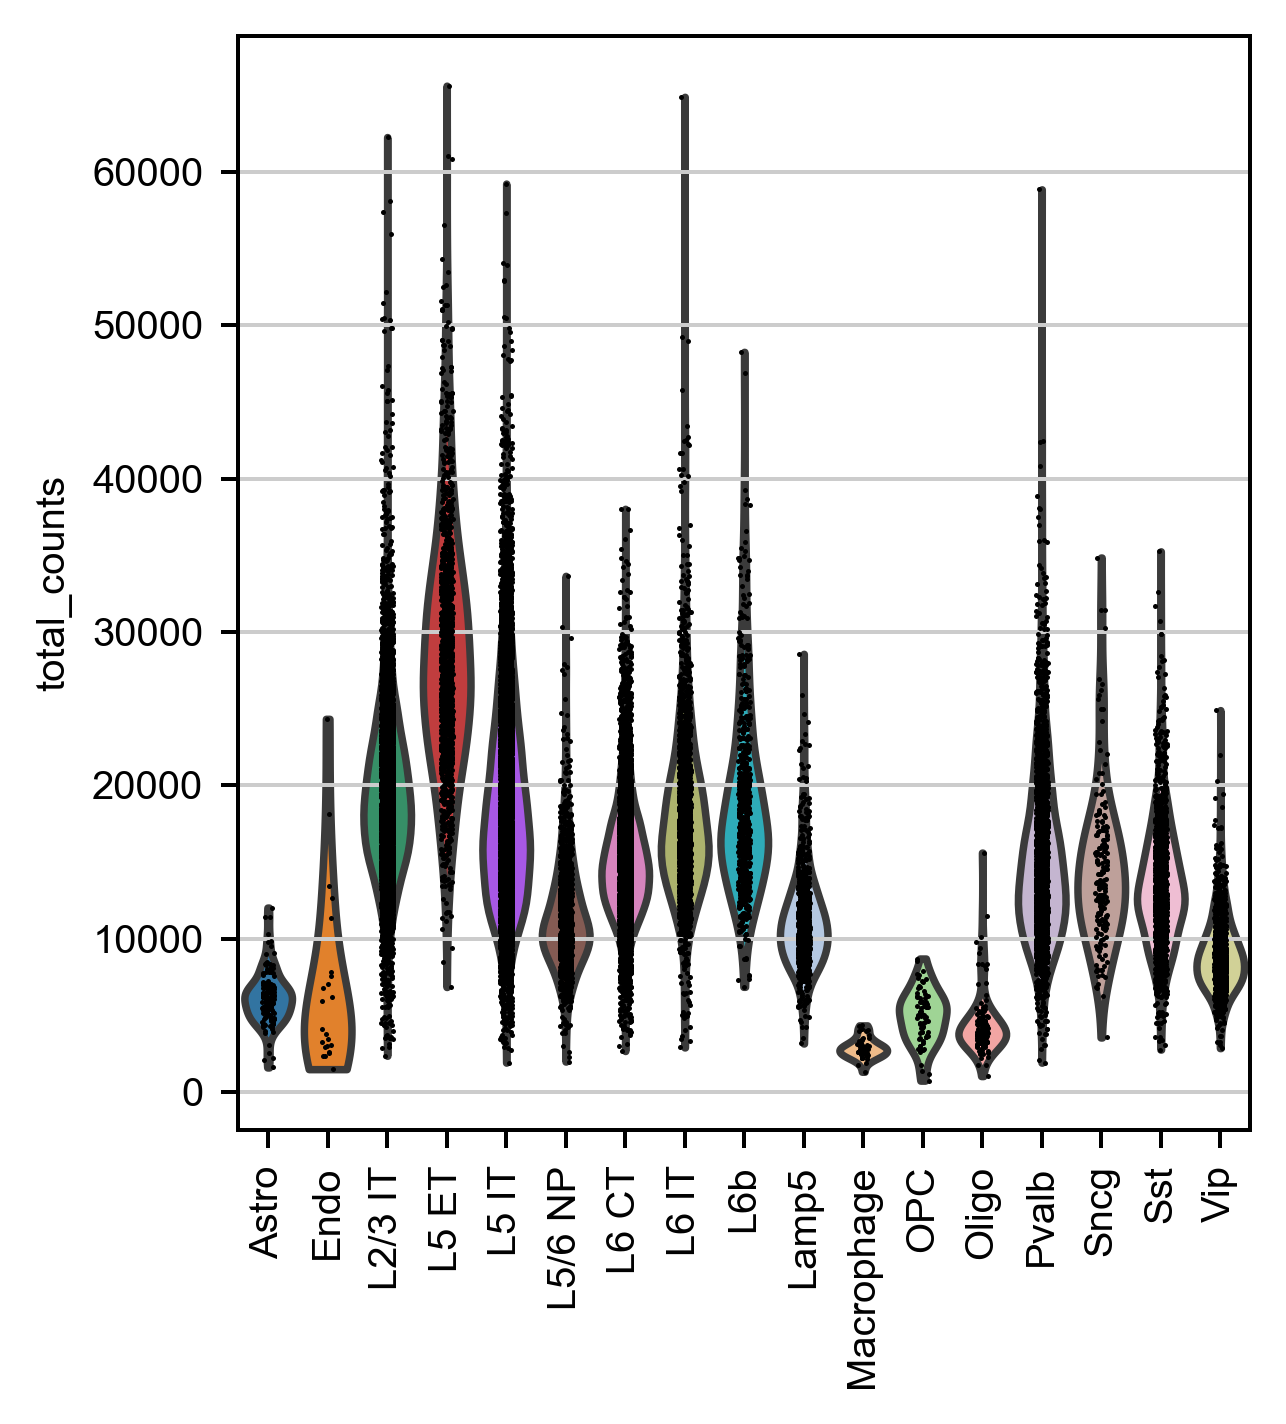

In [16]:
sc.pl.violin(filtered_adata, keys='total_counts', groupby='subclass_label', rotation=90)

# 4. Save the filtered h5ad

In [17]:
output_folder=r'L:\Shiwei\DNA_MERFISH_analysis\10x_nuclei_v3_MOp_AIBS\Analysis_10X_nuclei_v3_AIBS\processed'

In [18]:
filtered_adata.write(os.path.join(output_folder,r'MOp_10x_sn_filtered.h5ad'))